# Project Name: Visualizing Clusters in High Dimensions: Using UMAP for High-Dimensional Data Visualization

**Overview:**
This project introduces students to advanced dimensionality reduction techniques by applying Uniform Manifold Approximation and Projection (UMAP) to visualize and analyze clusters in high-dimensional datasets. Students will learn how UMAP effectively preserves local and global data structures, providing clear and insightful visualizations.

**You have:**
* High-dimensional datasets suitable for clustering visualization, such as MNIST, Fashion-MNIST, or gene expression data.
* Basic knowledge of Python programming, along with experience using NumPy, pandas, and visualization libraries like matplotlib and plotly.

* We will:
1. Preprocess and explore high-dimensional datasets to prepare for dimensionality reduction.
2. Implement UMAP, focusing on key parameters such as n_neighbors, min_dist, and n_components, to effectively project data into lower dimensions.
3. Visualize clusters using both 2D and interactive 3D scatter plots, analyzing how UMAP reveals inherent cluster structures and comparing these results with PCA or t-SNE visualizations.

**Goal:**
Students will develop practical skills in employing UMAP for insightful visualization of complex datasets, enhancing their understanding of manifold learning and cluster analysis in real-world scenarios.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from umap import UMAP
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.express as px
import base64
from IPython.display import display, HTML
import os
import warnings
warnings.filterwarnings("ignore")

## Notebook utility

In [36]:
image_paths = ["../img/umap{}.png".format(i) for i in range(1,8)] + ["../img/umap8.webp"]
# image_size = [1000, 700, 700, 400, 600, 500]
image_size = 700
images_html = []

mime_map = {
    ".png": "image/png",
    ".jpg": "image/jpeg",
    ".jpeg": "image/jpeg",
    ".gif": "image/gif",
    ".webp": "image/webp"
}

for i, path in enumerate(image_paths):
    ext = os.path.splitext(path)[1].lower()
    mime = mime_map.get(ext, "image/png")

    with open(path, "rb") as f:
        data = f.read()
    encoded = base64.b64encode(data).decode("utf-8")

    img_tag = f'<img src="data:{mime};base64,{encoded}" style="display: block; margin-left: auto; margin-right: auto; width: {image_size}px;" /><br>'
    images_html.append(img_tag)

## Theoretical Background


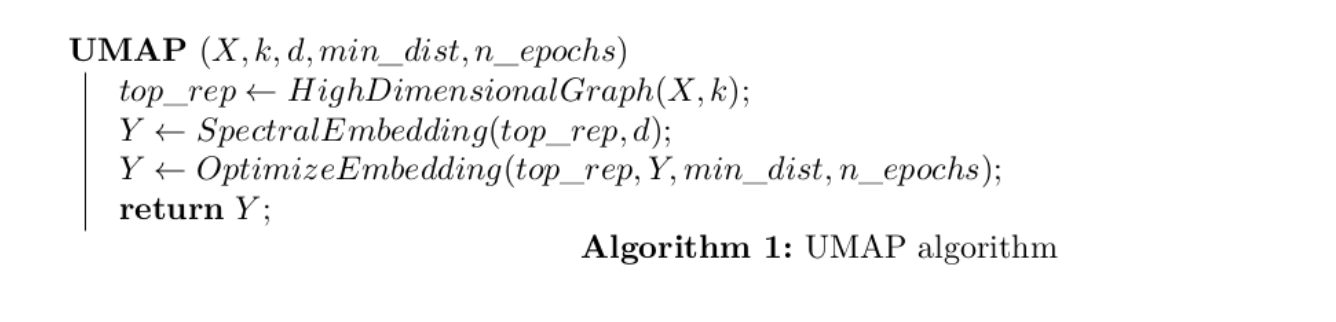

In [37]:
display(HTML(images_html[0]))


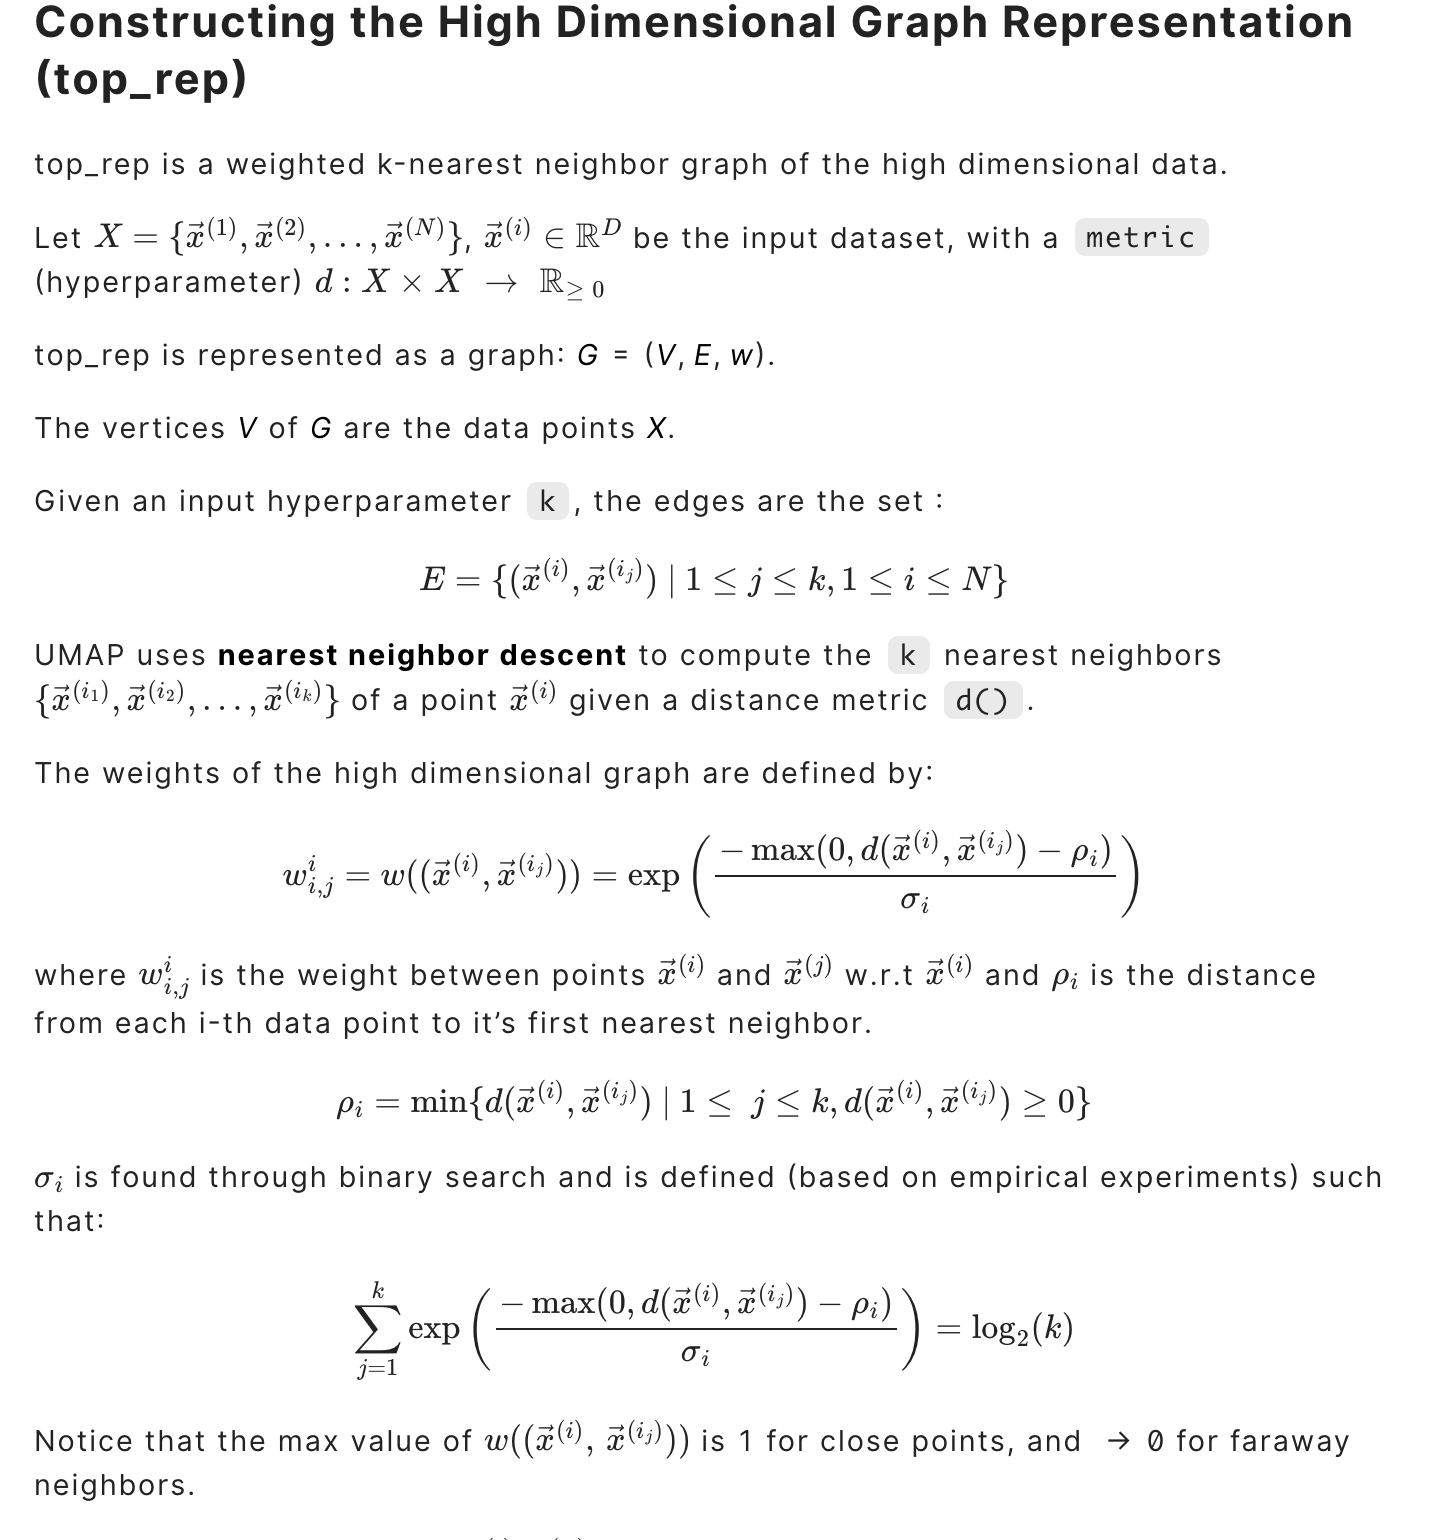

In [38]:
display(HTML(images_html[1]))


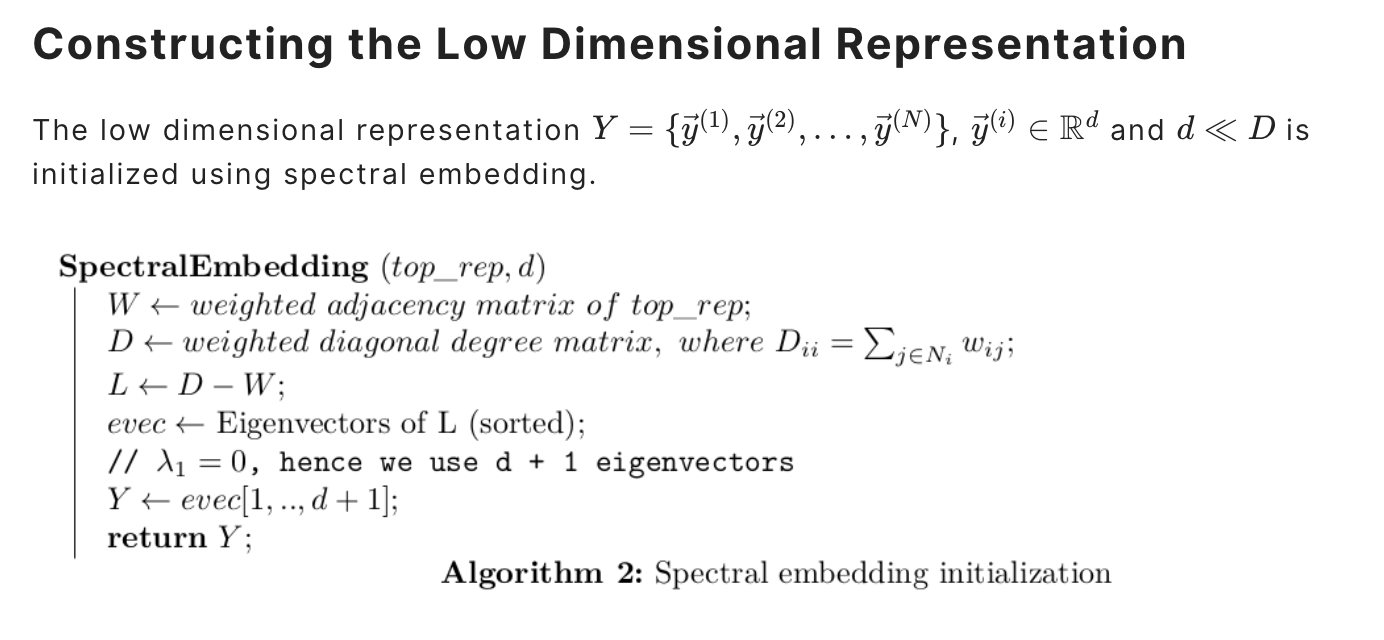

In [39]:
display(HTML(images_html[2]))


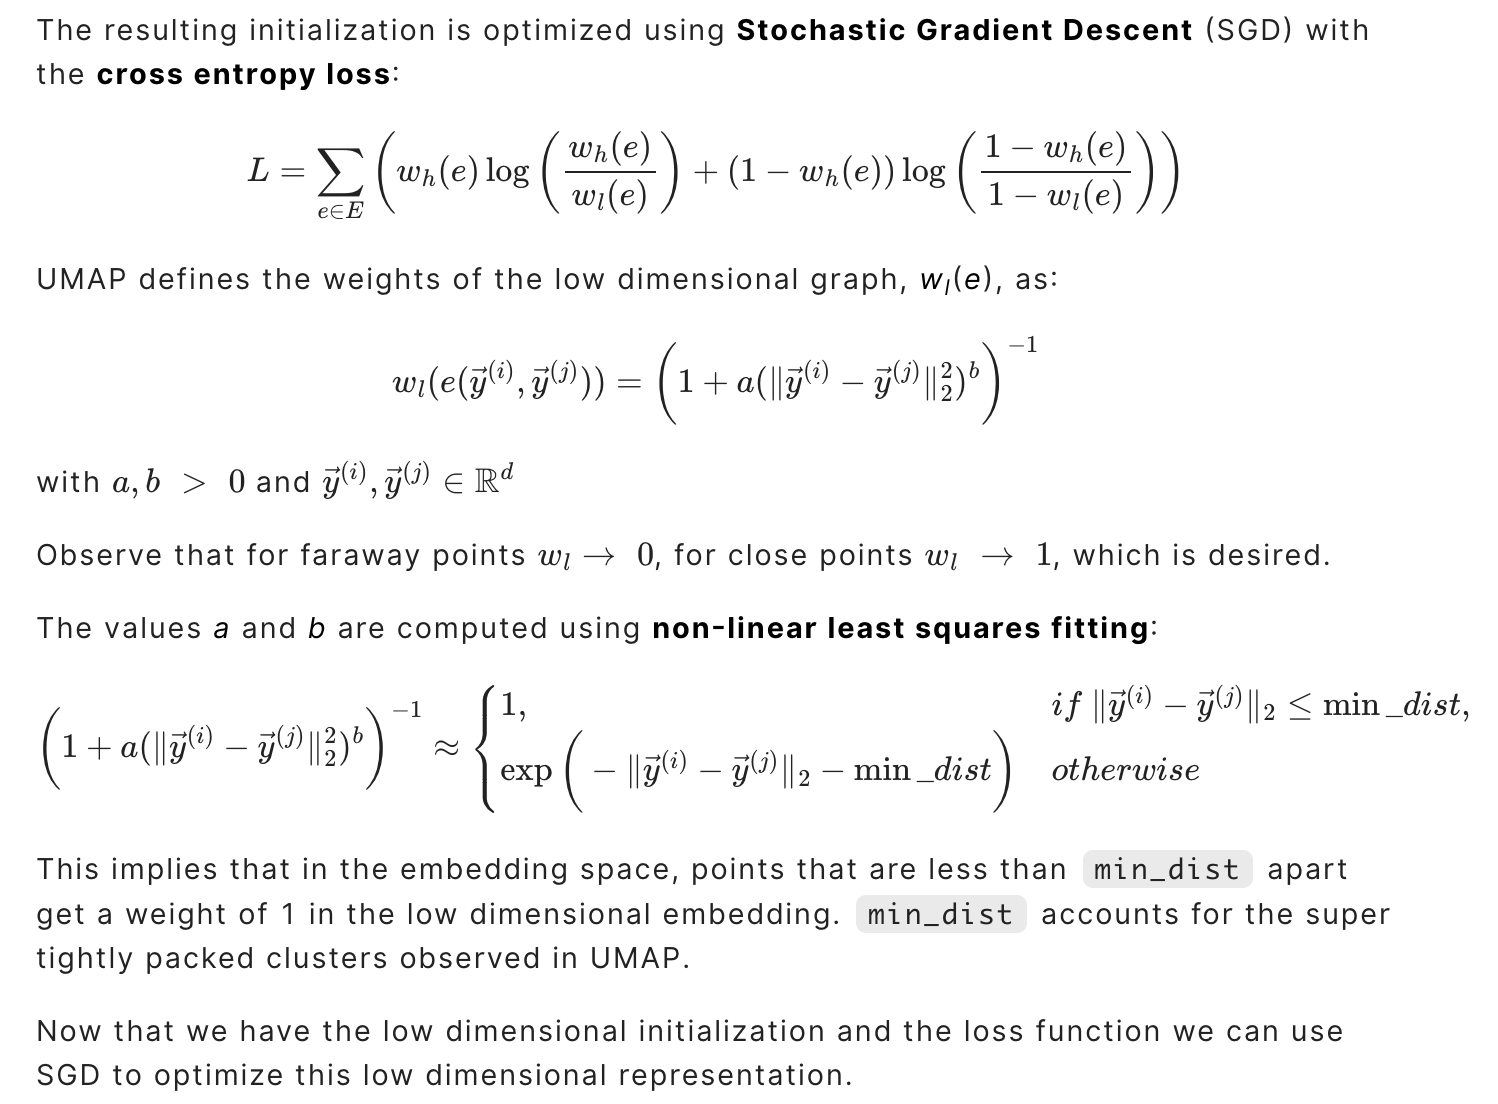

In [40]:
display(HTML(images_html[3]))


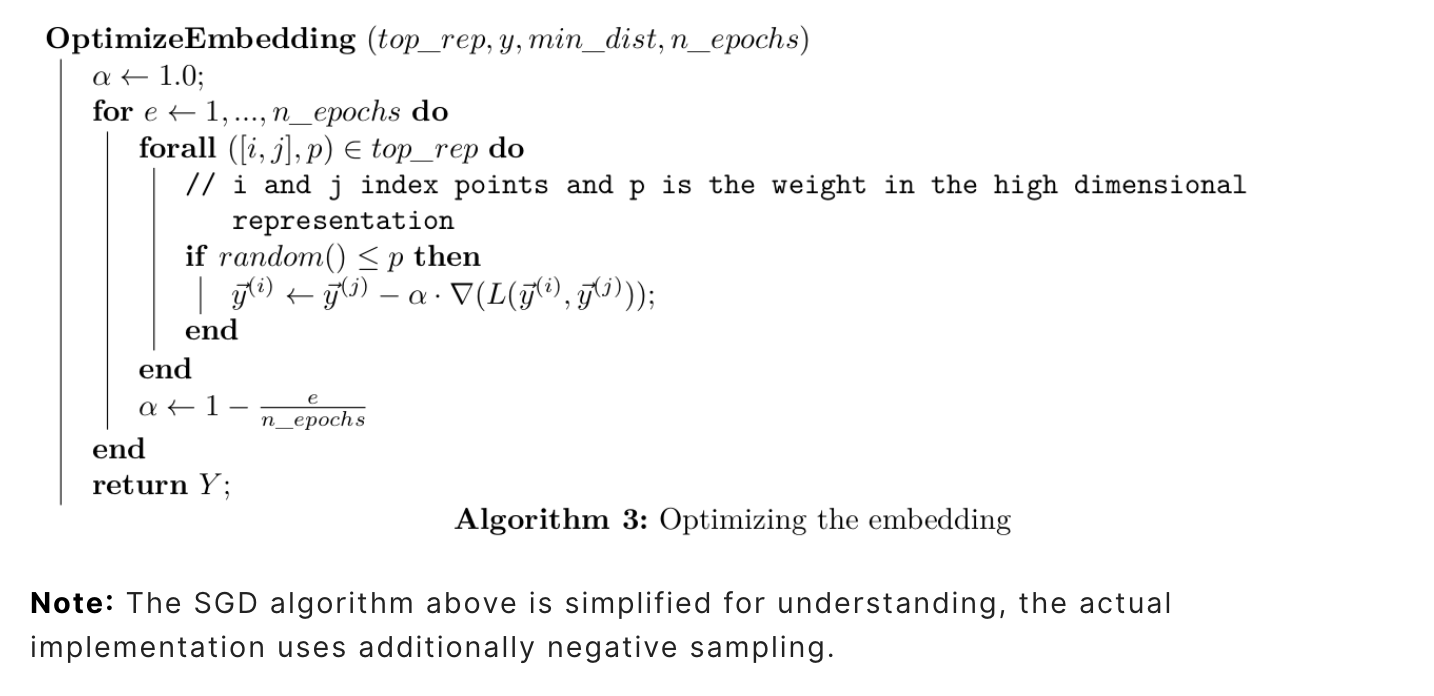

In [41]:
display(HTML(images_html[4]))


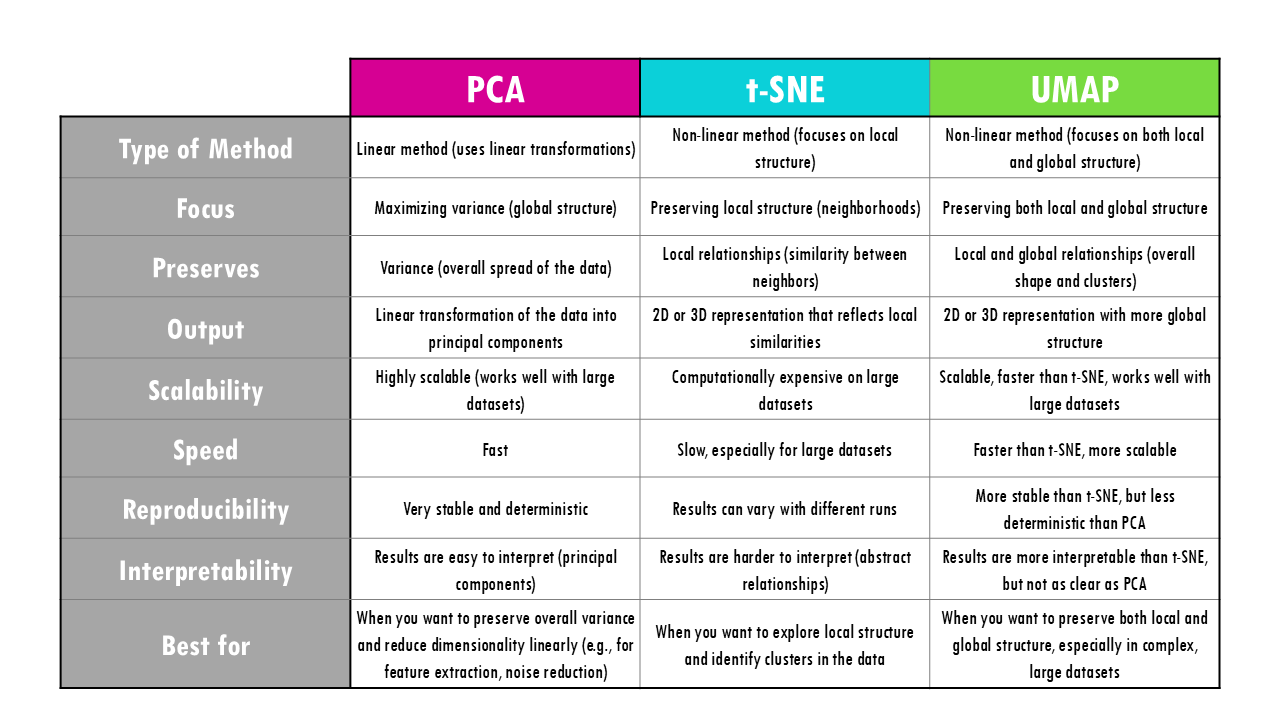

In [42]:
display(HTML(images_html[5]))


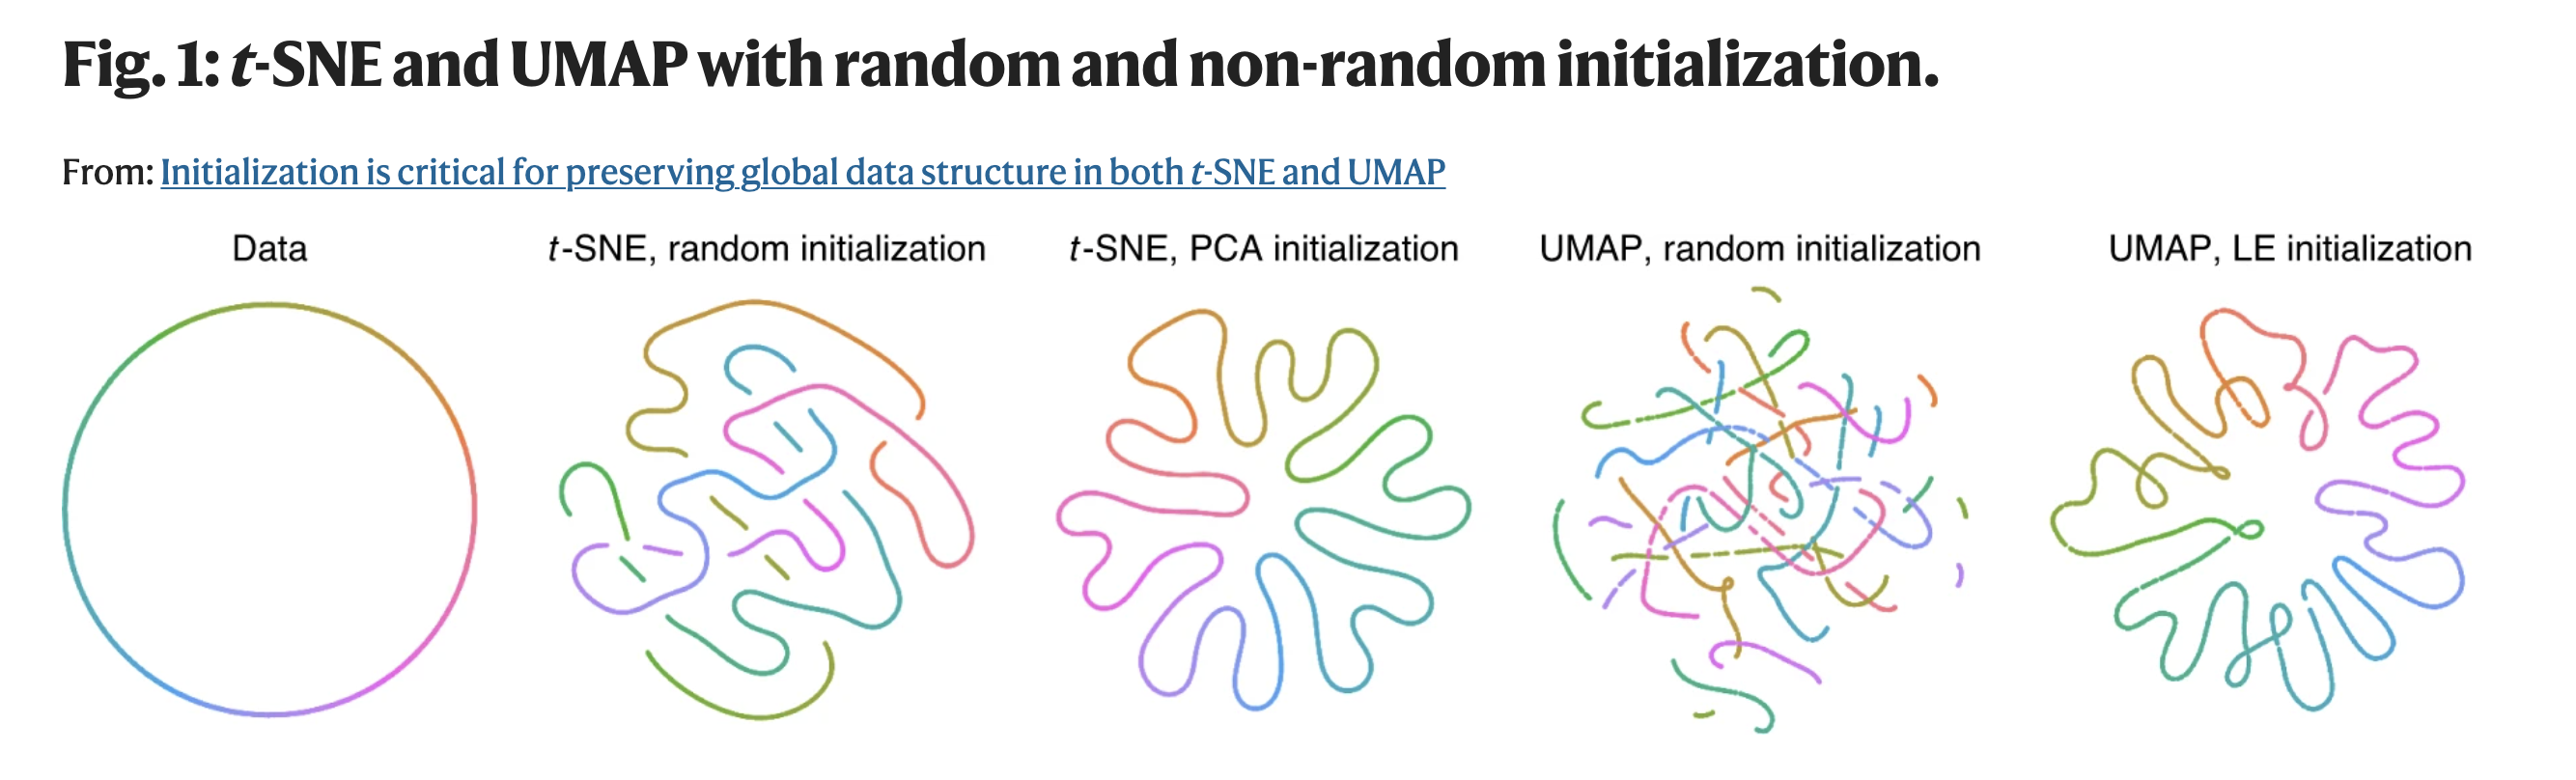

In [43]:
display(HTML(images_html[6]))


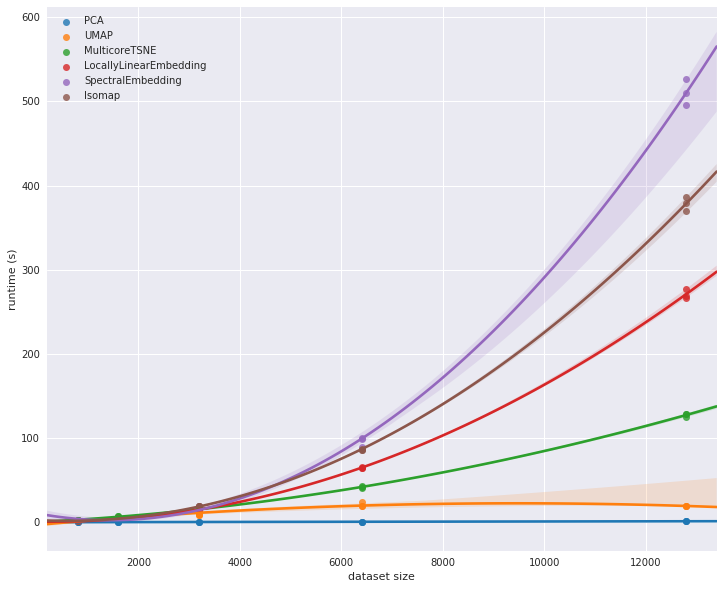

In [44]:
display(HTML(images_html[7]))

## Loading and inspecting dataset

In [3]:
print("Loading Fashion-MNIST dataset...")
fashion = fetch_openml(name="Fashion-MNIST", version=1, as_frame=False)
X = fashion['data']
y = fashion['target'].astype(int)

Loading Fashion-MNIST dataset...


In [4]:
np.random.seed(42)
indices = np.random.choice(len(X), 3000, replace=False)
X_sub = X[indices]
y_sub = y[indices]

In [8]:
print("Exploring the dataset...")

unique, counts = np.unique(y_sub, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("-> Class distribution:-")
for key in class_distribution.keys():
    print("Item {} : {} count".format(key,class_distribution[key]))
print("-> There are {} images in the dataset".format(len(X)))
print("-> There are {} unique targets in the dataset".format(len(np.unique(y))))
print("-> Size of each image is {0}".format(X_sub.shape))

Exploring the dataset...
-> Class distribution:-
Item 0 : 300 count
Item 1 : 288 count
Item 2 : 293 count
Item 3 : 296 count
Item 4 : 288 count
Item 5 : 307 count
Item 6 : 311 count
Item 7 : 298 count
Item 8 : 289 count
Item 9 : 330 count
-> There are 70000 images in the dataset
-> There are 10 unique targets in the dataset
-> Size of each image is (3000, 784)


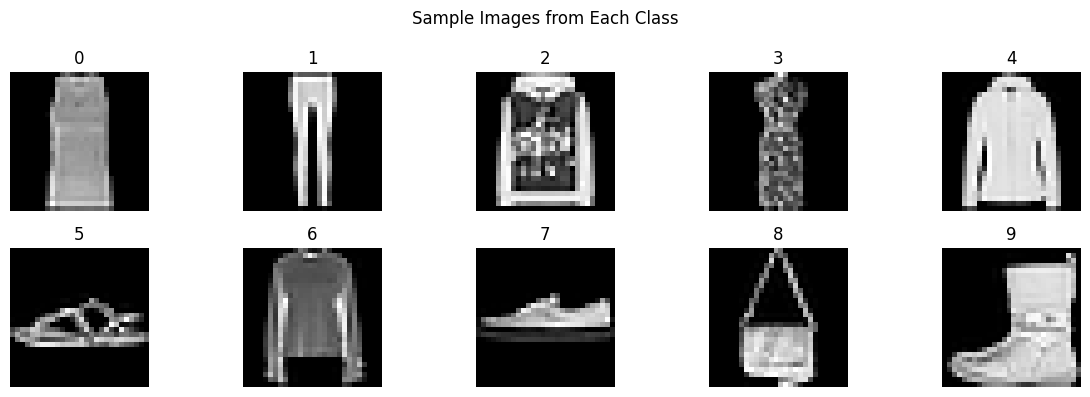

In [12]:
plt.figure(figsize=(12, 4))
classes = np.unique(y_sub)
for i, label in enumerate(classes[:10]):
    idx = np.where(y_sub == label)[0][0]
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_sub[idx].reshape(28, 28), cmap='gray')
    plt.title(label)
    plt.axis('off')
plt.suptitle("Sample Images from Each Class")
plt.tight_layout()
plt.show()

## Applying UMAP

In [13]:
umap_reducer = UMAP(
    n_neighbors=15,     # medium neighborhood: captures local cluster structure
    min_dist=0.1,       # small minimum distance: more tightly packed clusters
    n_components=2,     # project down to 2D
    random_state=42     # for reproducible results
)

X_umap = umap_reducer.fit_transform(X_sub)

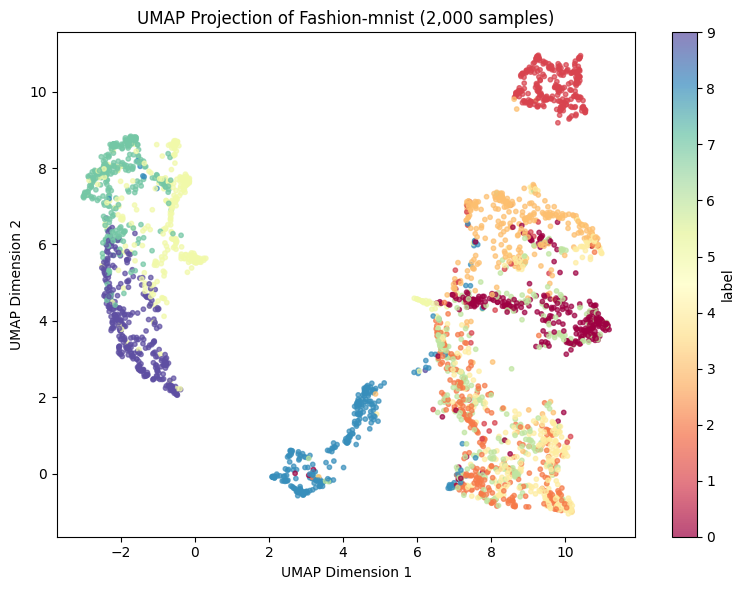

In [15]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_umap[:, 0], X_umap[:, 1],    # the two UMAP dimensions
    c=y_sub,                       # color by true digit label
    cmap='Spectral',               # a perceptually-uniform colormap
    s=10,                          # point size
    alpha=0.7                      # slight transparency
)
plt.title("UMAP Projection of Fashion-mnist (2,000 samples)")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.colorbar(scatter, label='label')
plt.tight_layout()
plt.show()

In [14]:
umap_3d = UMAP(n_neighbors=15, min_dist=0.1, n_components=3, random_state=42)
X_umap_3d = umap_3d.fit_transform(X_sub)

df_umap_3d = pd.DataFrame(X_umap_3d, columns=['UMAP1', 'UMAP2', 'UMAP3'])
df_umap_3d['label'] = y_sub

fig = px.scatter_3d(
    df_umap_3d,
    x='UMAP1', y='UMAP2', z='UMAP3',
    color='label',
    title='UMAP 3D Projection of Fashion-mnist',
    labels={'label':'item'}
)
fig.update_traces(marker=dict(size=3, opacity=0.8))
fig.show()

## Applying PCA

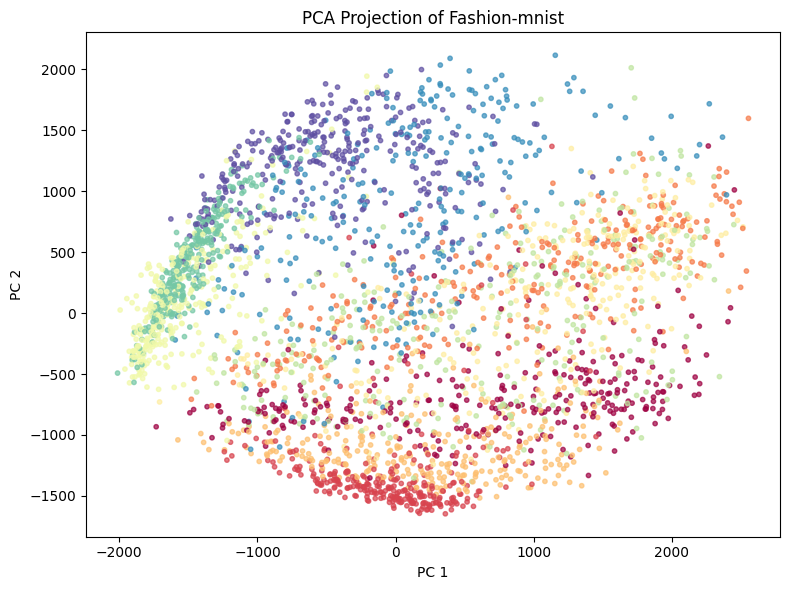

In [16]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_sub)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_sub, cmap='Spectral', s=10, alpha=0.7)
plt.title("PCA Projection of Fashion-mnist")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.tight_layout()
plt.show()

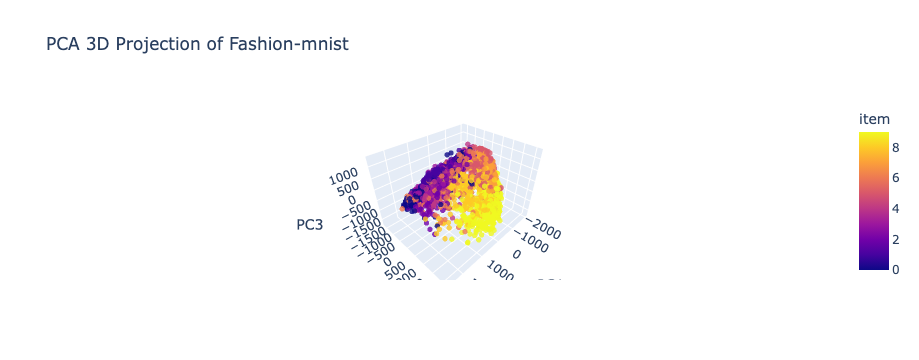

In [15]:
pca_3d = PCA(n_components=3, random_state=42)
X_pca_3d = pca_3d.fit_transform(X_sub)
df_pca_3d = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca_3d['label'] = y_sub
fig = px.scatter_3d(
    df_pca_3d,
    x='PC1', y='PC2', z='PC3',
    color='label',
    title='PCA 3D Projection of Fashion-mnist',
    labels={'label':'item'}
)
fig.update_traces(marker=dict(size=3, opacity=0.8))
fig.show()

## Applying t-SNE

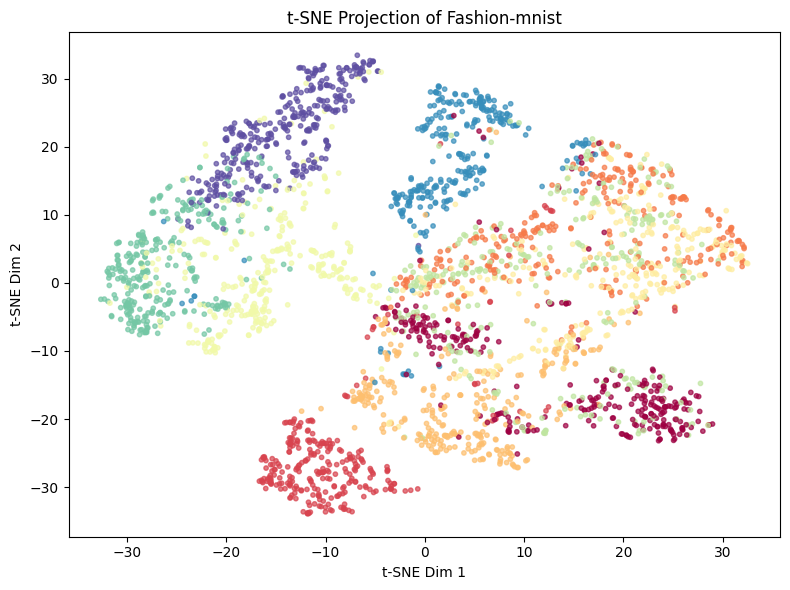

In [17]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
X_tsne = tsne.fit_transform(X_sub)
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sub, cmap='Spectral', s=10, alpha=0.7)
plt.title("t-SNE Projection of Fashion-mnist")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.tight_layout()
plt.show()

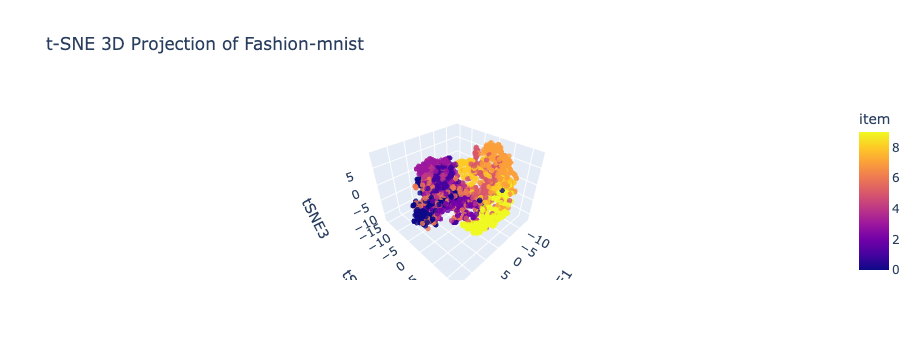

In [16]:
tsne_3d = TSNE(n_components=3, perplexity=30, n_iter=500, random_state=42)

X_tsne_3d = tsne_3d.fit_transform(X_sub)
df_tsne_3d = pd.DataFrame(X_tsne_3d, columns=['tSNE1', 'tSNE2', 'tSNE3'])
df_tsne_3d['label'] = y_sub
fig = px.scatter_3d(
    df_tsne_3d,
    x='tSNE1', y='tSNE2', z='tSNE3',
    color='label',
    title='t-SNE 3D Projection of Fashion-mnist',
    labels={'label':'item'}
)
fig.update_traces(marker=dict(size=3, opacity=0.8))
fig.show()

UMAP Concepts:
--------------
- Manifold Learning: Assumes high-dimensional data lie on a lower-dimensional manifold.
- Local vs Global Structure:
    * n_neighbors low → emphasizes local relationships (small clusters)
    * n_neighbors high → captures more global relationships (overall shape)
- min_dist controls cluster tightness: smaller min_dist → compact clusters, larger → more spread
- Advantages over PCA:
    * PCA is linear; cannot unfold complex manifolds.
    * UMAP preserves both local and some global topology.
- Advantages over t-SNE:
    * UMAP is often faster on large datasets.
    * Provides more meaningful global arrangements.
    * Has interpretable parameters for neighbor size and cluster tightness.
- Parameter Tuning:
    * Increase n_neighbors to reveal broader structures.
    * Adjust min_dist to control overlap vs separation.
    * Experiment with n_components >2 for 3D visualization.